In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage import io

In [8]:
#Import image data
pathlist = Path('D:/ives_png').rglob('*.png') 

img = []

for path in pathlist:
    img.append(io.imread(path))
    #print(path) # note re-indexing


In [9]:
#Convert images to arrays
ims = []
for x in img:
    im = np.asarray(x)
    im = im[:, :, 0]
    #im = im[None, :, :]#reshape
    ims.append(im)


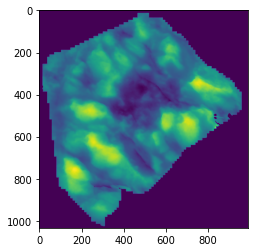

In [10]:
plt.imshow(ims[0])


In [ ]:
#optiional: BINARIZED
#convert image to array then binarize then filter
from gtda.images import Binarizer
from gtda.images import RadialFiltration
from gtda.images import HeightFiltration

ims = []
for x in img:
    im = np.asarray(x)
    im = im[:, :, 0]
    im = im[None, :, :]#reshape

    #binarize
    binarizer = Binarizer(threshold = 0.5)
    img_bin = binarizer.fit_transform(im)
    
    #radial filtration
    #radial_filtration = RadialFiltration(center=np.array([round(im.shape[0]/2), round(im.shape[1]/2)]))
    #im_filtration = radial_filtration.fit_transform(img_bin)
    
    #height filtration
    height_filtration = HeightFiltration()
    im_filtration = height_filtration.fit_transform(img_bin)

    #append to list
    ims.append(im_filtration)

In [11]:
#CUBICAL

from gtda.homology import CubicalPersistence
from gtda.diagrams import Scaler
from gtda.diagrams import Filtering


cubical_persistence = CubicalPersistence(n_jobs=-1)
scaler = Scaler()
filtering = Filtering()

pd = []
for x in ims:
    im_cubical = cubical_persistence.fit_transform([x])
    im_scaled = scaler.fit_transform(im_cubical) #scale
    im_filtered = filtering.fit_transform(im_scaled) #filter
    pd.append(im_filtered)

In [15]:
from gtda.diagrams import PairwiseDistance


distance = PairwiseDistance(metric='wasserstein') #default is p=2 

ws = [[0 for _ in range(29)] for _ in range(29)]
for i in range(0, len(pd)):
    for j in range(0, len(pd)):
        dists = distance.fit(pd[i])
        dists2 = dists.transform(pd[j])
        ws[i][j] = dists2[0][0]
    
    

TypeError: object of type 'module' has no len()

In [12]:
import pandas as pnd

wss = np.array(ws)
pnd.DataFrame(wss).to_csv('D:/wasserstein_cubical.csv')


NameError: name 'ws' is not defined

In [3]:
# LOWERSTAR CLUSTERING 

from ripser import Rips
from persim import PersImage
from persim import PersistenceImager
from persim import plot_diagrams

import scipy
from scipy import ndimage
import PIL

from ripser import ripser, lower_star_img

In [5]:
#Convert images to arrays
ims = []
for x in img:
    im = np.asarray(x)
    im = im[:, :, 0]
    ims.append(im)

#Lower-star filtration (takes a few mins)
dgms = []
for x in ims:
    dgm = lower_star_img(x)
    #print(len(dgm))
    dgm[np.isinf(dgm)] = 200 # deal with elder point
    dgms.append(dgm)

NameError: name 'ims' is not defined

In [ ]:
from persim import wasserstein

ws = [[0 for _ in range(29)] for _ in range(29)]
for i in range(len(dgms)):
    for j in range(len(dgms)):
        ws[i][j] = wasserstein(dgms[i], dgms[j])

In [4]:
wss = np.array(ws)
wss.shape
pnd.DataFrame(wss).to_csv('D:/wasserstein_lowerstar.csv')

NameError: name 'np' is not defined